In [2]:
import numpy as np
import scipy
import pandas as pd

In [3]:
import pickle
import copy

def save_obj(obj, name ):
    with open(name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name, 'rb') as f:
        return pickle.load(f)
    
    
nmf_dict = load_obj('nmf_dict.pkl')

In [4]:
nmf_dict.keys()

dict_keys(['LL', 'LL_norm', 'H_att10_norm', 'W_att10_norm', 'H_made10_norm', 'W_made10_norm', 'H_att16_norm', 'W_att16_norm', 'H_made16_norm', 'W_made16_norm', 'H_att20_norm', 'W_att20_norm', 'H_made20_norm', 'W_made20_norm', 'unique_players', 'list_of_playerSeason', 'X', 'Y'])

In [5]:
W_att = nmf_dict['W_att16_norm']
W_att.shape

(2400, 16)

In [6]:
LL_att = nmf_dict['LL']['SHOT_ATTEMPTED_FLAG']
W_att_norm = W_att.copy()
tot_shots = LL_att.sum(axis=1)
for i in range(len(W_att)):
    W_att_norm[i,:] = W_att[i,:] / tot_shots[i]

In [7]:
df_Watt = pd.DataFrame(W_att_norm, columns=["Basis %d"%i for i in range(16)])
df_Watt.describe()

,Basis 0,Basis 1,Basis 2,Basis 3,Basis 4,Basis 5,Basis 6,Basis 7,Basis 8,Basis 9,Basis 10,Basis 11,Basis 12,Basis 13,Basis 14,Basis 15
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,0.121183,0.086917,0.036421,0.088570,0.039833,0.051689,0.062321,0.033000,0.081470,0.035081,0.060727,0.077661,0.068630,0.051166,0.057908,0.047424
std,0.103287,0.067733,0.048162,0.086289,0.041409,0.053186,0.079052,0.042739,0.081673,0.042596,0.065621,0.080896,0.071381,0.056877,0.055970,0.058639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.051330,0.037596,0.000638,0.029617,0.008172,0.013025,0.001748,0.000413,0.020455,0.003819,0.013581,0.000775,0.004230,0.005039,0.014689,0.001046
50%,0.095602,0.073994,0.019283,0.064824,0.029200,0.037732,0.032030,0.018856,0.059013,0.022537,0.041709,0.058526,0.050598,0.033986,0.043722,0.027974
75%,0.159333,0.123551,0.050912,0.118564,0.057295,0.074374,0.095040,0.045910,0.118484,0.049575,0.086063,0.127116,0.109725,0.077872,0.084854,0.071121
max,0.743221,0.414833,0.451936,0.687572,0.251445,0.470643,0.584858,0.397744,0.563393,0.357003,0.534779,0.516578,0.410285,0.444342,0.464471,0.408888


In [36]:
df_Watt_meannorm = df_Watt.copy()
for col in df_Watt_meannorm.columns:
#     df_Watt_meannorm.loc[:,col] = (df_Watt_meannorm.loc[:,col] - df_Watt_meannorm[col].mean()) / (df_Watt_meannorm[col].max() - df_Watt_meannorm[col].min())
    df_Watt_meannorm.loc[:,col] = (df_Watt_meannorm.loc[:,col] - df_Watt_meannorm[col].mean()) / df_Watt_meannorm[col].std()
df_Watt_meannorm.describe()

,Basis 0,Basis 1,Basis 2,Basis 3,Basis 4,Basis 5,Basis 6,Basis 7,Basis 8,Basis 9,Basis 10,Basis 11,Basis 12,Basis 13,Basis 14,Basis 15
count,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03
mean,2.176962e-15,1.396938e-15,-4.707346e-16,2.471565e-15,-1.681803e-15,2.522834e-15,3.940367e-16,-2.297792e-15,1.619538e-16,5.701920e-16,2.054190e-15,-4.036586e-16,9.594177e-17,-5.536543e-16,-7.178980e-16,-9.708438e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.173260e+00,-1.283232e+00,-7.562064e-01,-1.026425e+00,-9.619314e-01,-9.718464e-01,-7.883587e-01,-7.721293e-01,-9.975172e-01,-8.235747e-01,-9.254222e-01,-9.600111e-01,-9.614709e-01,-8.995871e-01,-1.034621e+00,-8.087485e-01
25%,-6.762950e-01,-7.281655e-01,-7.429577e-01,-6.831989e-01,-7.645750e-01,-7.269520e-01,-7.662516e-01,-7.624752e-01,-7.470686e-01,-7.339210e-01,-7.184612e-01,-9.504336e-01,-9.022179e-01,-8.109887e-01,-7.721726e-01,-7.909121e-01
50%,-2.476627e-01,-1.907908e-01,-3.558214e-01,-2.751889e-01,-2.567889e-01,-2.624132e-01,-3.831828e-01,-3.309313e-01,-2.749688e-01,-2.944846e-01,-2.898261e-01,-2.365322e-01,-2.526232e-01,-3.020450e-01,-2.534596e-01,-3.316839e-01
75%,3.693674e-01,5.408655e-01,3.008986e-01,3.476058e-01,4.217002e-01,4.265239e-01,4.138833e-01,3.020656e-01,4.531984e-01,3.402494e-01,3.860961e-01,6.113469e-01,5.757130e-01,4.695306e-01,4.814472e-01,4.041115e-01
max,6.022423e+00,4.841328e+00,8.627417e+00,6.941779e+00,5.110233e+00,7.877126e+00,6.610019e+00,8.534229e+00,5.900651e+00,7.557502e+00,7.224074e+00,5.425734e+00,4.786389e+00,6.912716e+00,7.263955e+00,6.164247e+00


In [40]:
import sklearn.metrics.pairwise

dist_mat = 1. - sklearn.metrics.pairwise.cosine_similarity(df_Watt_meannorm)
dist_mat

array([[ 1.11022302e-16,  1.20734070e+00,  1.00784163e+00, ...,
         1.07813567e+00,  7.13199765e-01,  1.06288715e+00],
       [ 1.20734070e+00, -4.44089210e-16,  6.89645196e-01, ...,
         7.43279405e-01,  1.51808995e+00,  1.35682377e+00],
       [ 1.00784163e+00,  6.89645196e-01,  0.00000000e+00, ...,
         7.97670665e-01,  9.94217192e-01,  1.17243579e+00],
       ...,
       [ 1.07813567e+00,  7.43279405e-01,  7.97670665e-01, ...,
         1.11022302e-16,  1.31400296e+00,  1.15127388e+00],
       [ 7.13199765e-01,  1.51808995e+00,  9.94217192e-01, ...,
         1.31400296e+00, -2.22044605e-16,  4.04308028e-01],
       [ 1.06288715e+00,  1.35682377e+00,  1.17243579e+00, ...,
         1.15127388e+00,  4.04308028e-01,  0.00000000e+00]])

In [41]:
np.max(dist_mat)

1.9147659757206283

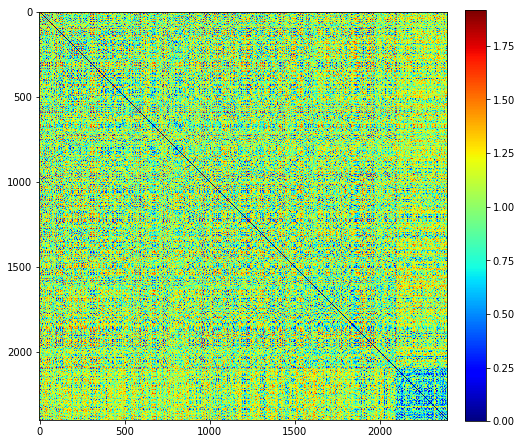

In [42]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(8,8))
im = plt.imshow(dist_mat,cmap='jet')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.show()

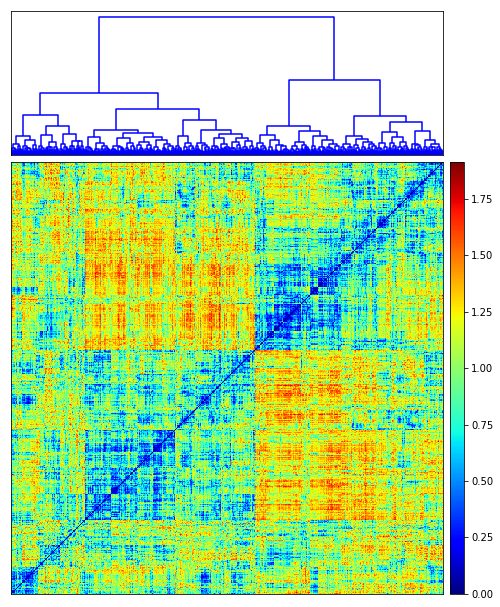

In [43]:
import scipy.cluster.hierarchy

fig = plt.figure(figsize=(10,10))

# Compute and plot dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = scipy.cluster.hierarchy.linkage(dist_mat, method='ward')
Z1 = scipy.cluster.hierarchy.dendrogram(Y,color_threshold = 1.45)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
dist_mat = dist_mat[idx1,:]
dist_mat = dist_mat[:,idx1]
im = axmatrix.matshow(dist_mat, aspect='auto', origin='lower',cmap='jet')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)